In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import math
%matplotlib inline

In [22]:
m = pd.read_csv('data/map_data.txt', sep='\t', header=None)

In [23]:
m.columns = ['x','y', 'id']

In [24]:
m.head()

,x,y,id
0,92.0640,-34.7770,1
1,61.1090,-47.1320,2
2,17.4200,-4.5993,3
3,-7.1285,-34.5400,4
4,232.3200,32.0320,5


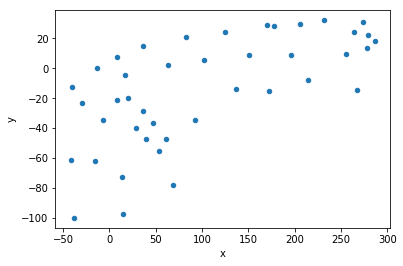

In [25]:
m.plot.scatter('x','y')

In [26]:
controls = pd.read_csv('data/control_data.txt', sep=' ', header=None)

In [27]:
controls.columns = ['v','phi']

In [28]:
controls.head()

,v,phi
0,3.9611,3.093700
1,4.0378,-0.008101
2,4.1173,0.005551
3,4.2066,0.011087
4,4.3007,-0.001022


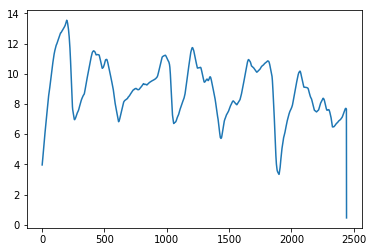

In [29]:
plt.plot(controls.v);

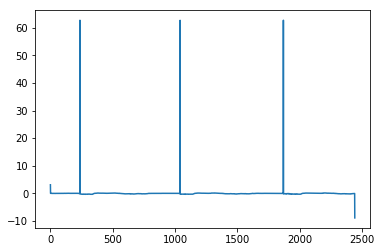

In [30]:
plt.plot(controls.phi);

In [31]:
gt = pd.read_csv('data/gt_data.txt', sep=' ', header=None)

In [32]:
gt.columns = ['x','y','azimuth']

In [33]:
gt.head()

,x,y,azimuth
0,6.2785,1.9598,0.00000
1,6.6632,2.0825,0.30937
2,7.0554,2.2076,0.30856
3,7.4561,2.3358,0.30912
4,7.8656,2.4671,0.31022


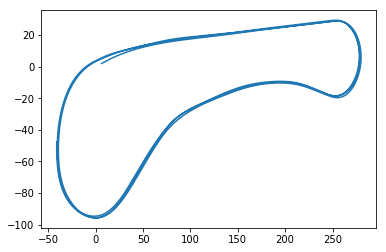

In [34]:
plt.plot(gt.x, gt.y);

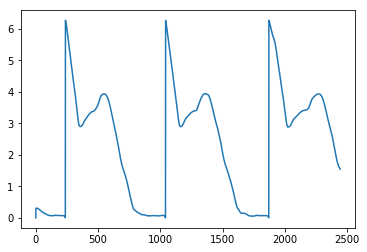

In [35]:
plt.plot(gt.azimuth);

In [36]:
obs_i=238

In [37]:
obs_file = "./data/observation/observations_"+'{0:06d}'.format(obs_i)+".txt"
obs = pd.read_csv(obs_file, sep=' ', header=None)
obs.columns = ['x_car','y_car']
car = gt.loc[obs_i-1]
obs['x'] = obs.x_car * math.cos(car.azimuth) - obs.y_car * math.sin(car.azimuth) + car.x
obs['y'] = obs.x_car * math.sin(car.azimuth) + obs.y_car * math.cos(car.azimuth) + car.y

In [38]:
obs.head()

,x_car,y_car,x,y
0,9.41010,-4.3444,264.506029,24.453285
1,0.44983,-18.9100,255.667632,9.813413
2,19.33100,2.3161,274.370997,31.196350
3,-22.70800,3.5020,232.323564,32.031364
4,23.80600,-7.0001,278.923592,21.917822


In [42]:
particles_file = "./data/particles/particles"+'{0:06d}'.format(obs_i)+".txt"
particles = pd.read_csv(particles_file, sep=' ', header=None)
particles.columns = ['x','y','theta','weight']

In [43]:
particles.head()

,x,y,theta,weight
0,255.691,28.5881,0.016094,1.322570e-01
1,255.401,28.0602,0.023210,1.099200e-04
2,255.738,28.5216,0.037008,3.489640e-13
3,255.570,28.4430,0.019479,8.676330e-01
4,256.034,28.3444,0.008890,6.949670e-14


In [44]:
[car.x]*len(obs)

[255.06, 255.06, 255.06, 255.06, 255.06, 255.06, 255.06, 255.06, 255.06]

In [45]:
[val for pair in zip([car.x]*len(obs), obs.x.tolist()) for val in pair]

[255.06,
 264.50602935660083,
 255.06,
 255.6676315801538,
 255.06,
 274.37099729586413,
 255.06,
 232.32356417619252,
 255.06,
 278.9235916889449,
 255.06,
 278.00048352926177,
 255.06,
 286.8902451702929,
 255.06,
 267.324218435312,
 255.06,
 205.389199069899]

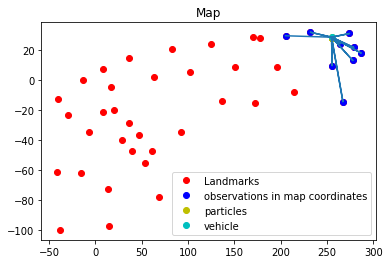

In [46]:
p1 = plt.plot(m.x.tolist(), m.y.tolist(), 'ro')
#p2 = plt.plot(obs.x_car.tolist(),obs.y_car.tolist(), 'go')
p3 = plt.plot(obs.x.tolist(),obs.y.tolist(), 'bo')
p4 = plt.plot(particles.x, particles.y, 'yo')
p5 = plt.plot(car.x, car.y, 'co')
linex = [val for pair in zip([car.x]*len(obs), obs.x.tolist()) for val in pair]
liney = [val for pair in zip([car.y]*len(obs), obs.y.tolist()) for val in pair]
p6 = plt.plot(linex, liney)

plt.title('Map')
#plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Landmarks', 'observations in vehicle coordinates', 'observations in map coordinates', 'particles', 'vehicle'))
plt.legend((p1[0], p3[0], p4[0], p5[0], p6[0]), ('Landmarks', 'observations in map coordinates', 'particles', 'vehicle'))
plt.show()

# Animation

In [47]:
N = len(gt)-1

In [48]:
N

2443

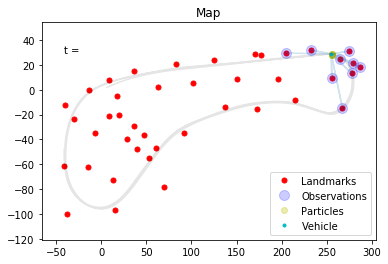

In [66]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure();
padding = 25
ax = plt.axes(xlim=(min(gt.x)-padding, max(gt.x)+padding), ylim=(min(gt.y)-padding, max(gt.y)+padding));

textTime = ax.text(min(gt.x), max(gt.y), 't = ')
p_m, = plt.plot(m.x.tolist(), m.y.tolist(), 'ro', ms=5)
p_obs, = plt.plot(obs.x.tolist(),obs.y.tolist(), 'bo', alpha=0.2, ms=10)
p_p, = plt.plot(particles.x, particles.y, 'yo', alpha=0.3)
p_car, = plt.plot(car.x, car.y, 'co', ms=3)
p_path, = plt.plot(gt.x, gt.y, 'k', alpha=.1)
linex = [val for pair in zip([car.x]*len(obs), obs.x.tolist()) for val in pair]
liney = [val for pair in zip([car.y]*len(obs), obs.y.tolist()) for val in pair]
p_lines, = plt.plot(linex, liney, alpha=.2)

plt.title('Map')
plt.legend((p_m, p_obs, p_p, p_car), 
           ('Landmarks', 'Observations', 'Particles', 'Vehicle'));
# plt.savefig('result1.png')

In [50]:
# initialization function: plot the background of each frame
def init():
    textTime.set_text('t = ')
    
    p_m.set_data([], [])
    p_obs.set_data([], [])
    p_p.set_data([], [])
    p_car.set_data([], [])
    p_path.set_data([], [])
    p_lines.set_data([],[])

    return textTime, p_m, p_obs, p_p, p_car, p_path, p_lines

In [56]:
def read_data(obs_i):
    obs_file = "./data/observation/observations_"+'{0:06d}'.format(obs_i)+".txt"
    obs = pd.read_csv(obs_file, sep=' ', header=None)
    obs.columns = ['x_car','y_car']

    car = gt.loc[obs_i-1]

    obs['x'] = obs.x_car * math.cos(car.azimuth) - obs.y_car * math.sin(car.azimuth) + car.x
    obs['y'] = obs.x_car * math.sin(car.azimuth) + obs.y_car * math.cos(car.azimuth) + car.y

    particles_file = "./data/particles/particles"+'{0:06d}'.format(obs_i)+".txt"
    particles = pd.read_csv(particles_file, sep=' ', header=None)
    particles.columns = ['x','y','theta','weight']

    return obs, particles, car

In [57]:
# animation function.  This is called sequentially
def animate(i):
    textTime.set_text('t = {0}'.format(i))

    p_m.set_data(m.x.tolist(), m.y.tolist())

    obs, particles, car = read_data(i+1)
    p_obs.set_data(obs.x.tolist(), obs.y.tolist())
    p_p.set_data(particles.x.tolist(), particles.y.tolist())
    p_car.set_data(car.x, car.y)

    p_path.set_data(gt.x.tolist()[:i], gt.y.tolist()[:i])

    linex = [val for pair in zip([car.x]*len(obs), obs.x.tolist()) for val in pair]
    liney = [val for pair in zip([car.y]*len(obs), obs.y.tolist()) for val in pair]
    p_lines.set_data(linex, liney)
    
    return textTime, p_m, p_obs, p_p, p_car, p_path, p_lines

In [58]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=N, 
#                               interval=20, # delay in ms
                               blit=True)

In [59]:
# brew install ffmpeg

In [60]:
%time anim.save('particle_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

CPU times: user 2min 53s, sys: 3min 40s, total: 6min 33s
Wall time: 2min 12s
